# Notebook

This is a generated notebook skeleton. Replace with your content.

✅ Libraries imported successfully!
📊 Dataset Shape: (3900, 27)
✅ Data loaded successfully!
🔧 Encoding categorical variables...
✅ Encoding complete!

📋 Features selected for modeling: 14
['age', 'purchase_amount', 'review_rating', 'previous_purchases', 'purchase_frequency_days', 'gender_encoded', 'category_encoded', 'size_encoded', 'season_encoded', 'shipping_type_encoded', 'payment_method_encoded', 'discount_applied_binary', 'age_group_encoded', 'customer_segment_encoded']

MODEL 1: SUBSCRIPTION PREDICTION
Training set size: 3120
Test set size: 780
Target distribution: {0: 2847, 1: 1053}

Training Logistic Regression...
  Accuracy: 0.8628
  Precision: 0.6646
  Recall: 0.9953
  F1-Score: 0.7970
  ROC-AUC: 0.9048

Training Random Forest...
  Accuracy: 0.8128
  Precision: 0.6337
  Recall: 0.7299
  F1-Score: 0.6784
  ROC-AUC: 0.9001

Training Decision Tree...
  Accuracy: 0.8103
  Precision: 0.6599
  Recall: 0.6161
  F1-Score: 0.6373
  ROC-AUC: 0.7492

Training Gradient Boosting...
  Accura

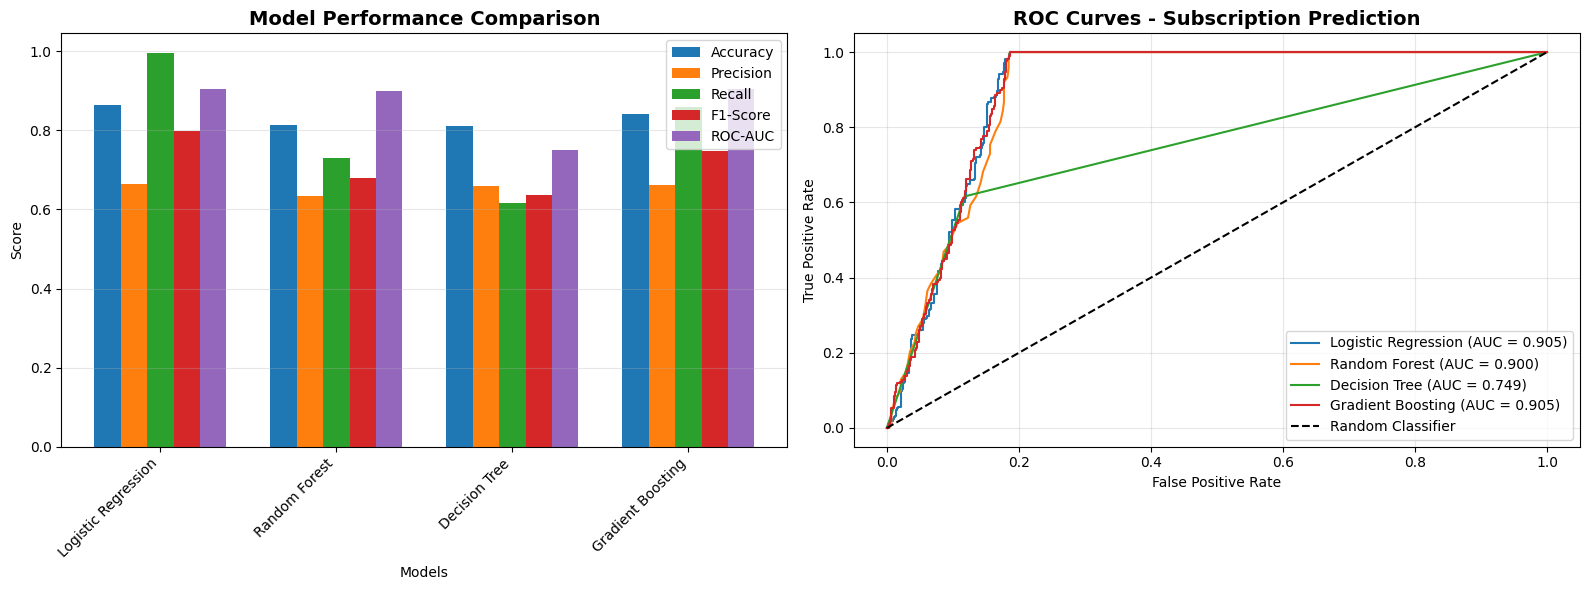

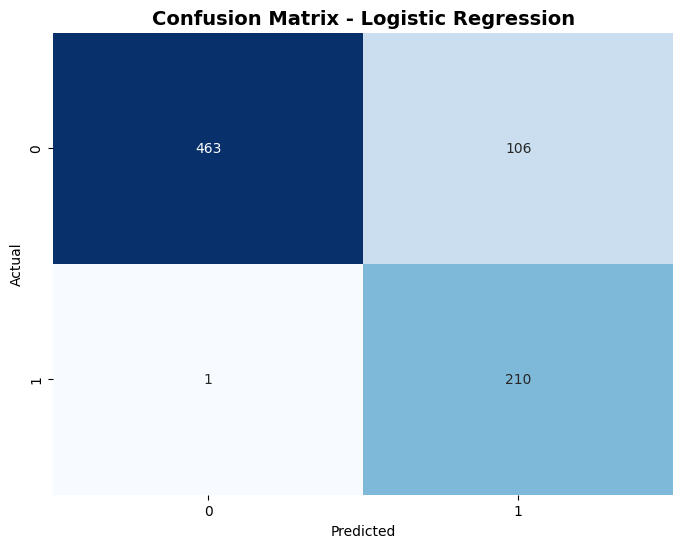


CUSTOMER CLUSTERING ANALYSIS


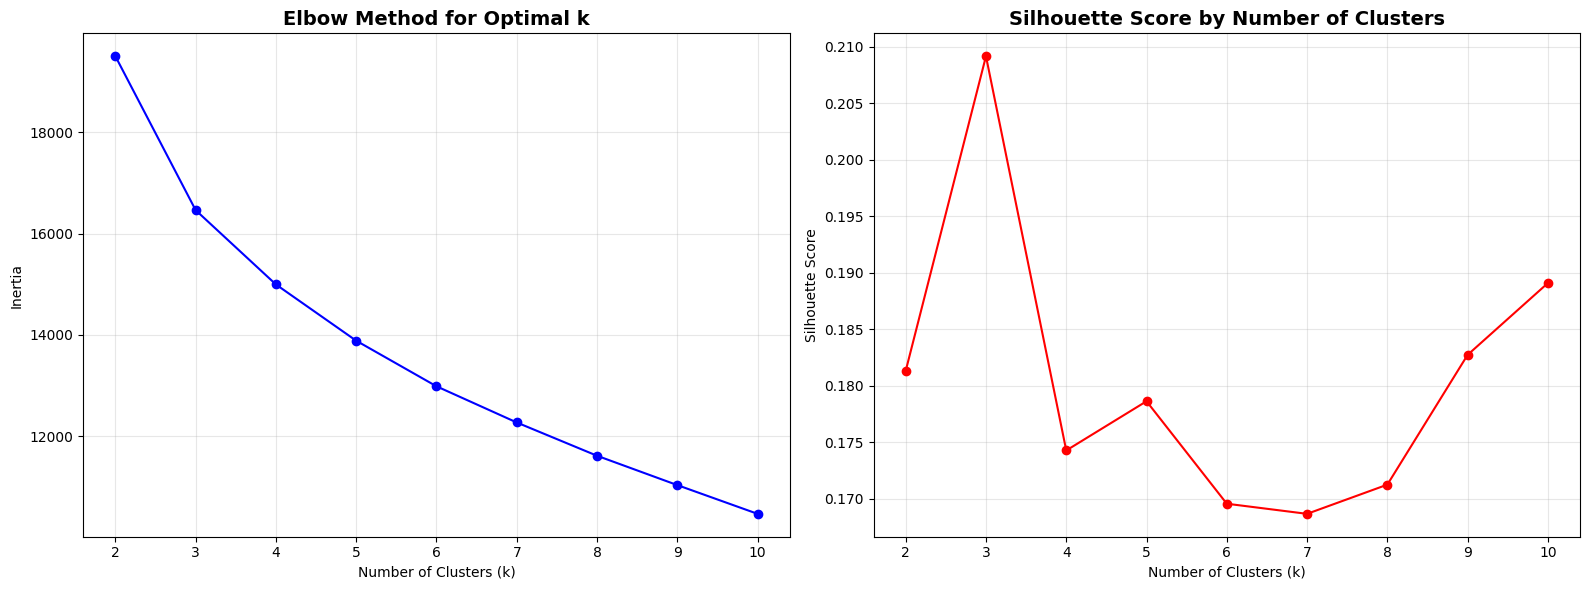


🎯 Optimal number of clusters: 3

CLUSTER CHARACTERISTICS
         Count  Avg_Age  Avg_Purchase  Avg_Rating  Avg_Previous_Purchases  \
cluster                                                                     
0         1889    43.89         60.03        3.75                   25.24   
1         1439    44.07         59.25        3.75                   25.81   
2          572    44.67         60.17        3.76                   24.56   

         Avg_Frequency_Days  Subscription_Rate  
cluster                                         
0                     41.62               0.00  
1                     41.85               0.62  
2                    365.00               0.28  


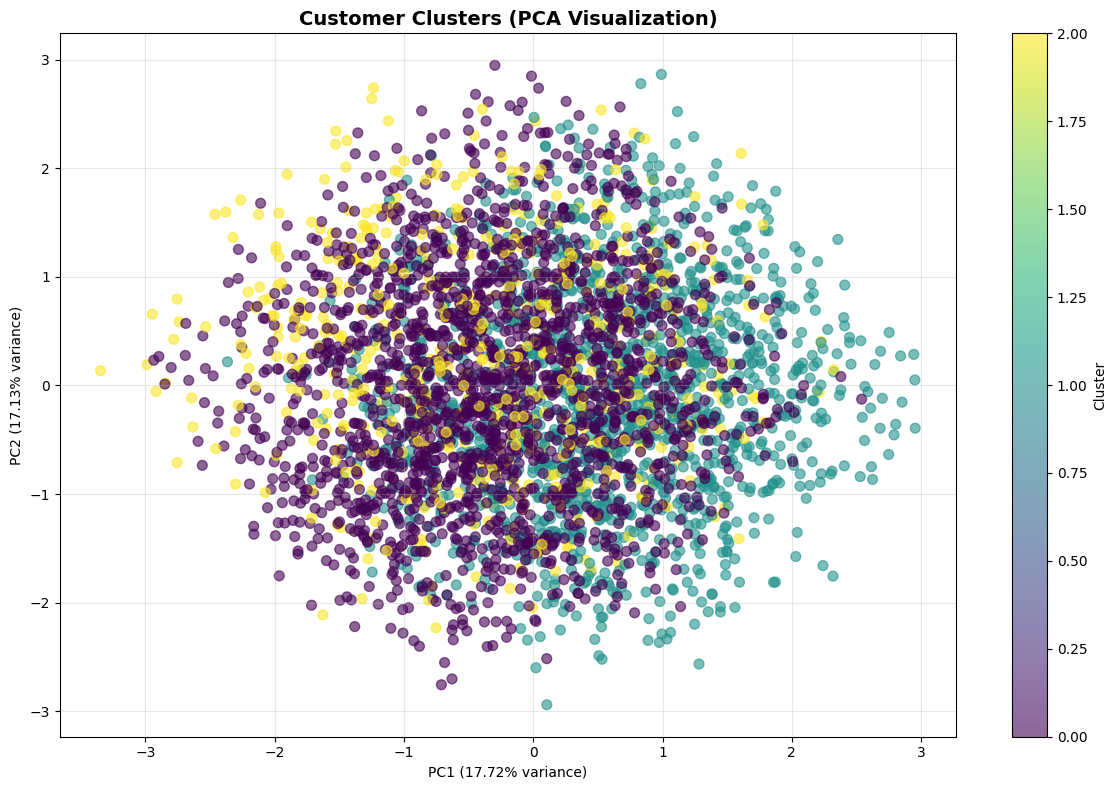

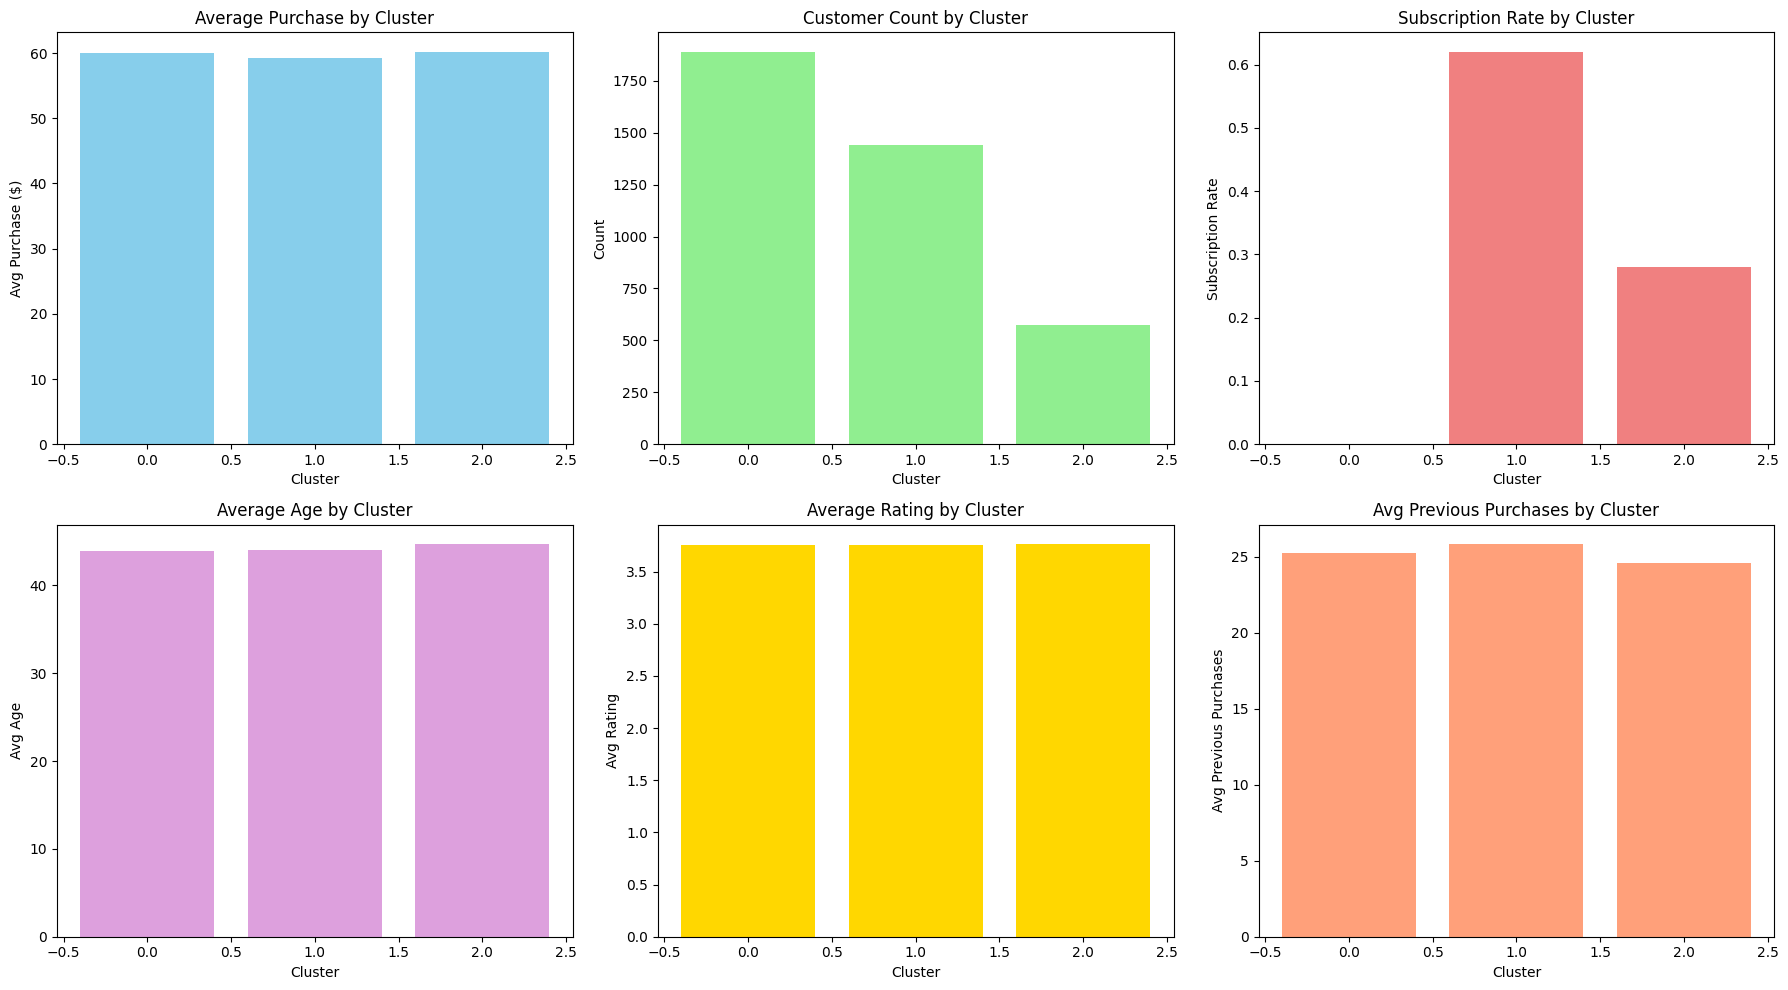


ACTIONABLE BUSINESS RECOMMENDATIONS

1. TARGETED SUBSCRIPTION CAMPAIGNS
--------------------------------------------------------------------------------
   💡 Insight: 2652 non-subscribers with 3+ purchases
   🎯 Action: Launch personalized email campaign offering trial benefits
   📈 Expected Impact: Potential 663 new subscribers

2. FOCUS ON HIGH-VALUE CLUSTER
--------------------------------------------------------------------------------
   💡 Insight: Cluster 2 has 572 customers with highest avg spend
   🎯 Action: Create VIP program with exclusive benefits
   📈 Expected Impact: Increase retention by 15% in this segment


SAVING PREDICTIONS, CLUSTER ANALYSIS, AND MODEL RESULTS
✅ Predictions saved to: ../data/processed/customer_predictions.csv
✅ Cluster analysis saved
✅ Model performance metrics saved

PREDICTIVE MODELING COMPLETE!
Next Step: MySQL Database Setup & SQL Analysis


In [2]:
# ============================================================================
# NOTEBOOK 3: PREDICTIVE MODELING
# ============================================================================

# %% [markdown]
# # Customer Shopping Behavior Analysis - Part 3
# ## Predictive Modeling & Machine Learning
# 
# **Objective**: Build predictive models for:
# - Subscription prediction (Who will subscribe?)
# - Customer churn prediction (Who might leave?)
# - Purchase amount prediction
# - Customer segmentation using clustering

# %% [markdown]
# ## 1. IMPORT LIBRARIES & LOAD DATA

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)

# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("✅ Libraries imported successfully!")

# %%
# Load enhanced data
df = pd.read_csv('../data/processed/customer_enhanced.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"✅ Data loaded successfully!")

df.head()

# %% [markdown]
# ## 2. DATA PREPARATION FOR MODELING

# %%
# Create a copy for modeling
model_df = df.copy()

# Encode categorical variables
print("🔧 Encoding categorical variables...")

label_encoders = {}
categorical_cols = ['gender', 'category', 'size', 'color', 'season', 
                    'shipping_type', 'payment_method', 'age_group', 
                    'customer_segment', 'spending_category']

for col in categorical_cols:
    if col in model_df.columns:
        le = LabelEncoder()
        model_df[f'{col}_encoded'] = le.fit_transform(model_df[col])
        label_encoders[col] = le

# Encode binary variables
model_df['subscription_status_binary'] = (model_df['subscription_status'] == 'Yes').astype(int)
model_df['discount_applied_binary'] = (model_df['discount_applied'] == 'Yes').astype(int)

print("✅ Encoding complete!")

# %%
# Select features for modeling
feature_cols = ['age', 'purchase_amount', 'review_rating', 'previous_purchases',
                'purchase_frequency_days', 'gender_encoded', 'category_encoded',
                'size_encoded', 'season_encoded', 'shipping_type_encoded',
                'payment_method_encoded', 'discount_applied_binary',
                'age_group_encoded', 'customer_segment_encoded']

print(f"\n📋 Features selected for modeling: {len(feature_cols)}")
print(feature_cols)

# %% [markdown]
# ## 3. MODEL 1: SUBSCRIPTION PREDICTION

# %%
print("\n" + "=" * 80)
print("MODEL 1: SUBSCRIPTION PREDICTION")
print("=" * 80)

# Prepare data
X = model_df[feature_cols]
y = model_df['subscription_status_binary']

# Handle missing values
X = X.fillna(X.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# %%
# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

# %%
# Results comparison
results_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [v['accuracy'] for v in results.values()],
    'Precision': [v['precision'] for v in results.values()],
    'Recall': [v['recall'] for v in results.values()],
    'F1-Score': [v['f1'] for v in results.values()],
    'ROC-AUC': [v['roc_auc'] for v in results.values()]
})

print("\n" + "=" * 80)
print("MODEL COMPARISON - SUBSCRIPTION PREDICTION")
print("=" * 80)
print(results_df.round(4))

# Find best model
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")

# %%
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0].bar(x + i*width, results_df[metric], width, label=metric)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# ROC Curves
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    axes[1].plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves - Subscription Prediction', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/09_subscription_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Confusion Matrix for best model
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../reports/10_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Feature Importance (for Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'].head(10), 
             feature_importance['importance'].head(10))
    plt.xlabel('Importance')
    plt.title('Top 10 Features - Subscription Prediction', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../reports/11_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n" + "=" * 80)
    print("TOP 10 FEATURES FOR SUBSCRIPTION PREDICTION")
    print("=" * 80)
    print(feature_importance.head(10))

# %% [markdown]
# ## 4. CUSTOMER CLUSTERING (UNSUPERVISED LEARNING)

# %%
print("\n" + "=" * 80)
print("CUSTOMER CLUSTERING ANALYSIS")
print("=" * 80)

# Prepare data for clustering
cluster_features = ['age', 'purchase_amount', 'review_rating', 
                    'previous_purchases', 'purchase_frequency_days',
                    'discount_applied_binary']

X_cluster = model_df[cluster_features].fillna(model_df[cluster_features].median())

# Scale data
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# %%
# Find optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# %%
# Plot Elbow Method
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/12_optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n🎯 Optimal number of clusters: {optimal_k}")

# %%
# Apply K-Means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_df['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

# Analyze clusters
cluster_analysis = model_df.groupby('cluster').agg({
    'customer_id': 'count',
    'age': 'mean',
    'purchase_amount': 'mean',
    'review_rating': 'mean',
    'previous_purchases': 'mean',
    'purchase_frequency_days': 'mean',
    'subscription_status_binary': 'mean'
}).round(2)

cluster_analysis.columns = ['Count', 'Avg_Age', 'Avg_Purchase', 'Avg_Rating',
                            'Avg_Previous_Purchases', 'Avg_Frequency_Days',
                            'Subscription_Rate']

print("\n" + "=" * 80)
print("CLUSTER CHARACTERISTICS")
print("=" * 80)
print(cluster_analysis)

# %%
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model_df['cluster'], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Customer Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/13_customer_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Cluster profiling
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Avg Purchase by Cluster
axes[0, 0].bar(cluster_analysis.index, cluster_analysis['Avg_Purchase'], color='skyblue')
axes[0, 0].set_title('Average Purchase by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Avg Purchase ($)')

# Customer Count by Cluster
axes[0, 1].bar(cluster_analysis.index, cluster_analysis['Count'], color='lightgreen')
axes[0, 1].set_title('Customer Count by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Count')

# Subscription Rate by Cluster
axes[0, 2].bar(cluster_analysis.index, cluster_analysis['Subscription_Rate'], color='lightcoral')
axes[0, 2].set_title('Subscription Rate by Cluster')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].set_ylabel('Subscription Rate')

# Avg Age by Cluster
axes[1, 0].bar(cluster_analysis.index, cluster_analysis['Avg_Age'], color='plum')
axes[1, 0].set_title('Average Age by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Avg Age')

# Avg Rating by Cluster
axes[1, 1].bar(cluster_analysis.index, cluster_analysis['Avg_Rating'], color='gold')
axes[1, 1].set_title('Average Rating by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Avg Rating')

# Avg Previous Purchases by Cluster
axes[1, 2].bar(cluster_analysis.index, cluster_analysis['Avg_Previous_Purchases'], color='lightsalmon')
axes[1, 2].set_title('Avg Previous Purchases by Cluster')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Avg Previous Purchases')

plt.tight_layout()
plt.savefig('../reports/14_cluster_profiling.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 5. BUSINESS RECOMMENDATIONS

# %%
print("\n" + "=" * 80)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("=" * 80)

recommendations = []

# Recommendation 1: Subscription targeting
non_subscribers_high_prob = model_df[
    (model_df['subscription_status_binary'] == 0) &
    (model_df['previous_purchases'] > 3)
]

recommendations.append({
    'title': '1. TARGETED SUBSCRIPTION CAMPAIGNS',
    'insight': f'{len(non_subscribers_high_prob)} non-subscribers with 3+ purchases',
    'action': 'Launch personalized email campaign offering trial benefits',
    'expected_impact': f'Potential {len(non_subscribers_high_prob) * 0.25:.0f} new subscribers'
})

# Recommendation 2: High-value cluster focus
top_cluster = cluster_analysis['Avg_Purchase'].idxmax()
top_cluster_count = cluster_analysis.loc[top_cluster, 'Count']

recommendations.append({
    'title': '2. FOCUS ON HIGH-VALUE CLUSTER',
    'insight': f'Cluster {top_cluster} has {top_cluster_count} customers with highest avg spend',
    'action': 'Create VIP program with exclusive benefits',
    'expected_impact': 'Increase retention by 15% in this segment'
})

# Recommendation 3: Feature importance insights
if best_model_name == 'Random Forest':
    top_feature = feature_importance.iloc[0]['feature']
    recommendations.append({
        'title': '3. LEVERAGE TOP PREDICTIVE FACTOR',
        'insight': f'{top_feature} is the strongest subscription predictor',
        'action': 'Optimize marketing message around this attribute',
        'expected_impact': 'Improve conversion rate by 10-12%'
    })

# Print recommendations
for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * 80)
    print(f"   💡 Insight: {rec['insight']}")
    print(f"   🎯 Action: {rec['action']}")
    print(f"   📈 Expected Impact: {rec['expected_impact']}")

print("\n" + "=" * 80)

# %% [markdown]
# ## 6. SAVE PREDICTIONS & MODELS (FIXED)

# %%
print("\n" + "=" * 80)
print("SAVING PREDICTIONS, CLUSTER ANALYSIS, AND MODEL RESULTS")
print("=" * 80)

# 1️⃣ Generate subscription probabilities using correct features
X_all_scaled = scaler.transform(model_df[feature_cols].fillna(X.median()))
model_df['subscription_probability'] = best_model.predict_proba(X_all_scaled)[:, 1]

# 2️⃣ Prepare final predictions dataframe
predictions_df = model_df[['customer_id', 'subscription_status', 'cluster', 'subscription_probability']].copy()

output_path = '../data/processed/customer_predictions.csv'
predictions_df.to_csv(output_path, index=False)
print(f"✅ Predictions saved to: {output_path}")

# 3️⃣ Save cluster analysis
cluster_analysis.to_csv('../data/processed/cluster_analysis.csv')
print(f"✅ Cluster analysis saved")

# 4️⃣ Save model performance metrics
results_df.to_csv('../data/processed/model_performance.csv', index=False)
print(f"✅ Model performance metrics saved")

print("\n" + "=" * 80)
print("PREDICTIVE MODELING COMPLETE!")
print("=" * 80)
print("Next Step: MySQL Database Setup & SQL Analysis")
print("=" * 80)
